In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [18]:
area = np.array([2600, 3000, 3200, 3600, 4000])
price = np.array([550000, 565000, 610000, 680000, 725000])

In [19]:
dct = {
    'area' : area,
    'price' : price
}

In [20]:
price_df = pd.DataFrame(dct)

In [21]:
price_df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [22]:
import seaborn as sns

Text(0.5, 1.0, 'Area vs Price Plot')

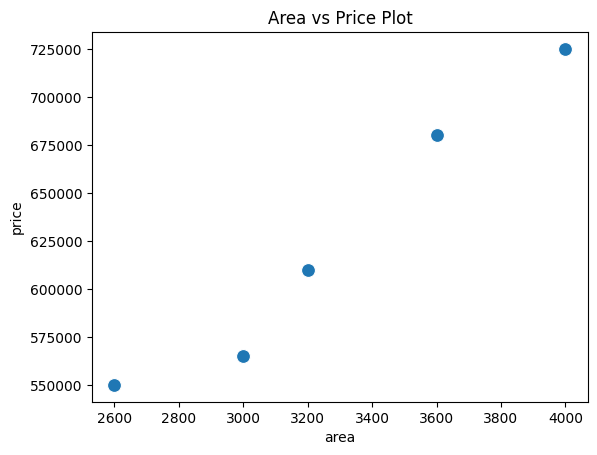

In [23]:
sns.scatterplot(
    x= 'area',
    y= 'price',
    data= price_df,
    s=100
    )

plt.title('Area vs Price Plot')

In [24]:
reg = linear_model.LinearRegression()

reg.fit(price_df[['area']], price_df.price)

LinearRegression()

In [25]:
reg.predict([[3300]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [30]:
# y = mx = c

# coefficient (m)
m = reg.coef_

# constant
c = reg.intercept_

print(m, c)

[135.78767123] 180616.43835616432


In [31]:
m * 3300 + c

array([628715.75342466])

In [32]:
areas = [1000, 1500, 2300, 3540, 4120, 5450, 4750, 2300, 9000, 8600, 7100]

In [37]:
areas_df = pd.DataFrame({
    'area': areas
})

In [38]:
areas_df

,area
0,1000
1,1500
2,2300
3,3540
4,4120
5,5450
6,4750
7,2300
8,9000
9,8600


In [44]:
areas_df['predicted_prices'] = reg.predict(areas_df)

In [45]:
areas_df

,area,predicted_prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,5450,9.206592e+05
6,4750,8.256079e+05
7,2300,4.929281e+05
8,9000,1.402705e+06
9,8600,1.348390e+06


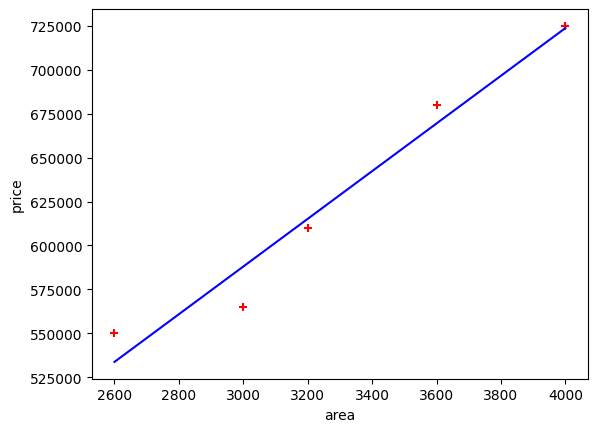

In [55]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(price_df.area, price_df.price, color='red', marker='+');
plt.plot(price_df.area, reg.predict(price_df[['area']]), color='blue');


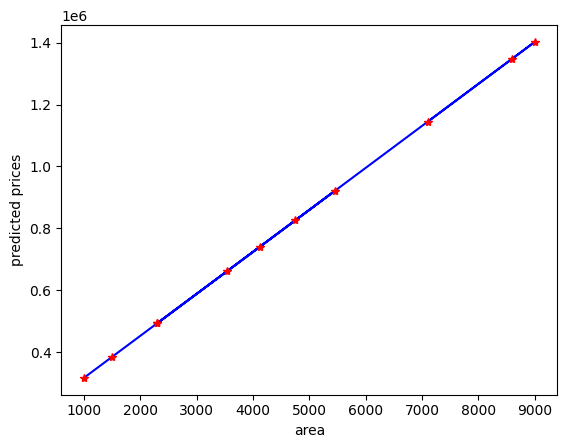

In [57]:
%matplotlib inline
plt.xlabel('area')
plt.ylabel('predicted prices')
plt.plot(areas_df.area, areas_df.predicted_prices
         , color='blue'
         , marker='*', mfc='red', mec='red')

# Linear Regression Single Variable Assignment

In [65]:
per_capita_url = "https://raw.githubusercontent.com/codebasics/py/master/ML/1_linear_reg/Exercise/canada_per_capita_income.csv"

In [66]:
canada_df = pd.read_csv(per_capita_url)

In [68]:
canada_df.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [69]:
canada_df.rename(columns={
    'per capita income (US$)': 'pci_usd'
}
                 , inplace=True)

In [70]:
canada_df.head()

,year,pci_usd
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [71]:
reg_model = linear_model.LinearRegression()

reg_model.fit(canada_df[['year']], canada_df.pci_usd)

LinearRegression()

In [83]:
reg_model.predict([[2020]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

In [84]:
print(reg.coef_)
print(reg.intercept_)

[135.78767123]
180616.43835616432


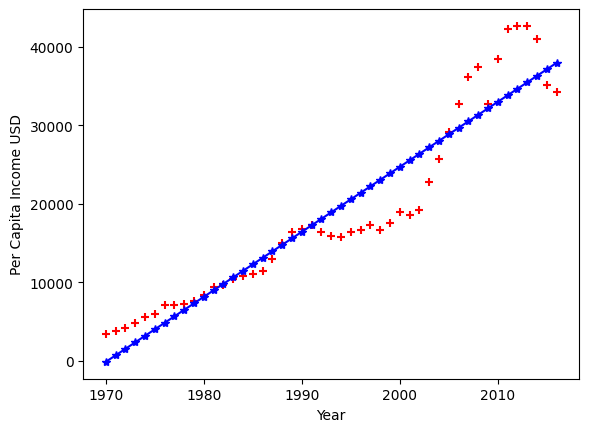

In [86]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Per Capita Income USD')

plt.scatter(canada_df.year, canada_df.pci_usd, color='red', marker='+');
plt.plot(canada_df.year, reg_model.predict(canada_df[['year']])
, color='blue'
, marker='*'
, mec='blue'
, mfc='blue');